# Studying Wikipedia HTML Dumps
This notebook provides a tutorial for how to work with the [Wikimedia Enterprise](https://meta.wikimedia.org/wiki/Wikimedia_Enterprise) HTML dumps. The format of the dumps is detailed in this [README](https://dumps.wikimedia.org/other/enterprise_html/). An introduction to some of the crucial ways in which the parsed HTML version of Wikipedia articles can differ from the raw [wikitext](https://en.wikipedia.org/wiki/Help:Wikitext) that editors use to construct articles can be found in [Mitrevski et al.](https://arxiv.org/pdf/2001.10256.pdf)

This notebook has four stages:
* Accessing the HTML dumps
* Working with wikitext
* Working with HTML
* Comparing the HTML and wikitext versions of articles

## About the notebook 

The given notebook has four sections, namely, 
- Accessing the HTML dumps
- Working with wikitext 
- Working with HTML 
- Comparing the HTML and wikitext versions of articles 

Working with wikitext involved the use of `mwparserfromhell` and to work with HTML, `BeautifulSoup` was significantly used. Other libraries of python such as `nltk`, `matplotlib`, along with BeautifulSoup have also been used to work with the comparison aspect of the notebook.  
  
  HTML and wikitext have been compared on three levels which are the following : 
  - Feature Analysis
  - Text Analysis
  - Time Analysis
  
Please note : Comments have been added wherever necessary to make it convenient for the user to understand what is being done. 

## Accessing the HTML dumps
This is an example of how to parse through the HTML dumps for a wiki -- i.e. complete parsed HTML versions of all the articles in a given project.

In [2]:
import json  # format HTML object is stored in
import tarfile  # necessary for decompressing dump file into text format
import os  # file path manipulation

import mwparserfromhell as mw  # best library for working with the raw wikitext

In [3]:
# HTML is available for every Wikimedia project: https://www.mediawiki.org/wiki/Special:SiteMatrix
# The format here is the language code (en = English; ar = Arabic; etc.)
# followed by the project code (wiki = Wikipedia; wikisource = Wikisource)
SITENAME = 'enwiki'

# Dump date -- only the last 6 runs are kept so this dump may at one point no longer be available and need updated
DATE = '20220201'

# namespace code -- namespace 0 is the article namespace. Other namespaces contain Media files or talk pages etc.
# See: https://en.wikipedia.org/wiki/Wikipedia:Namespace
NS = 0

# directory on PAWS server that holds Wikimedia dumps
DUMP_DIR = "/public/dumps/public/other/enterprise_html/runs"
HTML_DUMP_FN = os.path.join(DUMP_DIR, DATE, f'{SITENAME}-NS{NS}-{DATE}-ENTERPRISE-HTML.json.tar.gz')

In [4]:
# Very large dataset; we will only work with a small portion
# Choosing a different language would make processing more manageable though
!ls -shH "{HTML_DUMP_FN}"

ls: cannot access '/public/dumps/public/other/enterprise_html/runs/20220201/enwiki-NS0-20220201-ENTERPRISE-HTML.json.tar.gz': No such file or directory


In [ ]:
with tarfile.open(HTML_DUMP_FN, mode="r:gz") as tar:
    # we're just going to look at the first block of articles -- each one is a maximum of 10GB
    html_fn = tar.next()
    print(f'We will be working with {html_fn.name} ({html_fn.size / 1000000000:0.3f} GB).')
    # extract the first file
    with tar.extractfile(html_fn) as fin:
        for line in fin:
            article = json.loads(line)
            break

# As you can see, each line not only contains the HTML of the article (`html`),
# it also contains the raw wikitext (`wikitext`) that was parsed to generate that HTML
# and a lot of article metadata such as the categories, templates, and whether there are any redirects (https://en.wikipedia.org/wiki/Wikipedia:Redirect)
# and metadata about the most recent edit (date, comment left by the editor, username, etc.)
# https://en.wikipedia.org/wiki/Chang_Gum-chol
print(f"\nExample article in dump: {json.dumps(article, indent=2)}")

## Working with wikitext
Because the wikitext dumps have been available for a long time, there is a rich ecosystem of tools for manipulating and parsing it. A great example of this [mwparserfromhell](https://pypi.org/project/mwparserfromhell/), which is a Python library that can be used to parse wikitext into recognizable objects such as [links](https://en.wikipedia.org/wiki/Help:Link), [templates](https://en.wikipedia.org/wiki/Help:Template), or [sections](https://en.wikipedia.org/wiki/Help:Section).

Here we will show all of the nice things you can do with mwparserfromhell and the wikitext from our example article.

In [ ]:
# raw wikitext -- you can see some of the article text but also some weird template code and all sorts of syntax
article['article_body']['wikitext']

In [ ]:
wt = mw.parse(article['article_body']['wikitext'])

# types of objects that can be extracted from the wikitext
# note that `html_entities` is not the parsed HTML but text like `&Sigma;` that is code for Σ
[f for f in dir(wt) if f.startswith('filter')]

In [ ]:
print(f'This article has:')
print(f'* {len(wt.get_sections())} sections ({", ".join([str(h.title) for h in wt.filter_headings()[:2]])}, ...)')
print(f'* {len(wt.filter_wikilinks())} wikilinks ({", ".join([str(l.title) for l in wt.filter_wikilinks()[:2]])}, ...) '
      f'including {len(wt.filter_wikilinks(matches=lambda c: c.title.startswith("Category:")))} categories')
print(f'* {len(wt.filter_templates())} templates ({", ".join([str(t.name) for t in wt.filter_templates()[:2]])}, ...)')
print(f'* {len(wt.filter_external_links())} external links ({", ".join([str(e.url) for e in wt.filter_external_links()[:1]])}, ...)')
print(f'* {len(wt.filter_tags())} tags ({", ".join([str(t.tag) for t in wt.filter_tags()[:5]])}, ...) including {len(wt.filter_tags(matches=lambda t: t.tag == "ref"))} reference.')
print(f'* {len(wt.filter_comments())} comment ({wt.filter_comments()[0]})')

In [ ]:
# It's not perfect, but we can also remove all the wikitext syntax and just leave behind the article text:
print(wt.strip_code())

## Working with HTML

Here you will show how you might extract similar features from the HTML. Complete the TODOs below.

In [ ]:
# You'll almost certainly want to take advantage of some existing Python libraries for working with the HTML
# such as BeautifulSoup (https://beautiful-soup-4.readthedocs.io/en/latest/)
from bs4 import BeautifulSoup as BS
from bs4 import Comment

In [ ]:
article['article_body']['html']

### TODO : Different Feature Counts

In [6]:
# TODO: Choose a few of the features above -- e.g., sections, categories -- or any others you can think of
# Show how to extract them from the HTML
# If you get different counts than the counts based on the wikitext, see if you can explain why

In [ ]:
soup = BS(article['article_body']['html'])

#find all the tags
for tags in soup.findAll(True):
    print(tags.name)
    
#find all the external links
for a in soup.find_all('a', href=True):
    print(a['href'])

#find all comments
comments = soup.find_all(string=lambda text: isinstance(text, Comment))
for c in comments:
    print(c)
    
#total number of sections
for s in soup.find_all('sections'):
    print(s)

In [ ]:
print(f'This article has:')

#total number of tags
print('Total number of tags is', len(soup.findAll(True)))

#total number of external links
print('Total number of external links is', len(soup.find_all('a', href=True)))

#total number of comments
print('Total number of comments is', len(soup.find_all(string=lambda text: isinstance(text, Comment))))

#total number of sections
print('Total number of sections is', len(soup.find_all("sections")))


## Different counts of features

### The above cell extracted four features from HTML, namely, tags, external links and comments. 
- The total number of tags extracted by wikitext is 23 whereas by HTML is 173.
- The total number of external links extracted by wikitext is 2 whereas by HTML is 24.
- The total number of comments extracted by both wikitext and HTML is 1.
- The total number of sections extracted by wikitext is 5 whereas by HTML is 0.

The MediaWiki software is used in parsing wikitext to HTML. As mentioned in 'WikiHist.html: English Wikipedia's Full Revision History in HTML Format' (Mitrevski, Piccardi, & West, 2020), during parsing, additional macros (templates and modules) are added in HTML which in turn provide more information implicit in the external templates and modules. These external macros are invoked by wikitext. Due to this, there is more information present in HTML than wikitext and wikitext just becomes an approximation.  
These authors also conducted an analysis on the hyperlinks and found that over half of the wikilinks present in HTML are missing from the raw wikitext (Mitrevski, Piccardi, & West, 2020).  
This analysis is also proven from the statistics received by us. Working with one another and extracting features from wikitext and HTML, we obtained the above mentioned results. The links extracted from wikitext equal 2 whereas the number extracted by HTML equals 24 which confirms that over half of the wiki links pres
Furthermore, this software only allows the use of a certain set of HTML elements. The rest are deprecated HTML elements and need be used with some replacement. The following sections talk more about deprecated HTML elements.  

In [15]:
# TODO: Are there features / data that are available in the HTML but not the wikitext?
# You may have to go through several example articles to find these
# https://www.mediawiki.org/wiki/Specs/HTML/2.4.0 has some additional details about what you might find


# HTML v/s wikitext

### Data 

The MediaWiki software parses wikitext to HTML. During parsing, additional content is added through the process of expanding the templates and the modules. This expansion of templates results in significant portions of HTML being inserted in the parsed output. Therefore, the presence of these macros (templates and modules) in HTML implies there is more information provided by HTML than the wikitext source. 
  
  Wikitext can only provide an approximation of the complete information available in its corresponding Wikipedia article, the cause of this, as already mentioned, is because of the parsing process. During this process, the expansion of templates and modules provides more information implicit in external macros which are invoked by the wikitext. Thus, while studying wikitext one must remember that the information offered through wikitext is only an approximation of the complete information from the articles (Mitrevski, Piccardi, & West, 2020). 
  
  For example : In an analysis conducted on Wikipedia's hyperlinks, it was observed that over half of the wiki links present in HTML are missing from raw wikitext (Mitrevski, Piccardi, & West, 2020).
  
  Hyperlinks is one such example to clearly identify the differences in data in html and wikitext. The macros (templates and modules) invoked by wikitext during the process of parsing also includes other entities such as tables, images, references, tags and more. Below, tags have been used as an example to explain in detail the discrepancies noticed in html and wikitext. 

### Tags
Some HTML tags have an equivalent in wikitext markup and hence are generally preferred whereas there are a few deprecated HTML tags which may not be supported in the future. Thus, in order to use these deprecated HTML tags, one requires a replacement for these tags. 
  
  For Example : 

HTML Deprecated tag : `<big>`
  
  Replacement : `<span style="font-size: larger;">`

HTML Deprecated tag : `<tt>`
  
  Replacement : `<code>` for source code ; `<kbd>` for user input ; `<var>` for variables and `<samp>` for computer output. 


In [16]:
# TODO: write a function for extracting the article text
# It doesn't have to look the same as the output of `wt.strip_code()` above (in fact, it likely won't)
# but it should be very similar in that you should aim for something
# that captures the text of the article without a lot of markup etc.
# NOTE: straightforward HTML -> text functions likely won't perform well here and you'll probably
# want to write something more custom to handle the specifics of Wikipedia articles

For the following section, I have used two methods. 
- Method 1 : Pre-processing of data
- Method 2 : Using BeautifulSoup

### Method 1 : Pre-processing of data 

For this method, I have used `regex` and the following five functions have been created.

- remove_punct : This function removes all the punctuations from the text. 
- remove_urls : This function removes all the URLs. The URLs are identified with `https://` and `www.`
- remove_tag : This function removes all the tags from the HTML and have been identified with angular brackets, that is, `<` and `>`
- pre_process_sentence : This function uses the above mentioned two functions namely `remove_punct` and `remove_urls`. It takes the sentences as it’s argument and converts all sentences into lowercase. 
- pre_process_article : This function uses `pre_process_sentence` function and sends the article as its argument. The `sent_tokenizer` splits the sentences into tokens and perfoms tokenization. The processed sentences are then appended to the sentences list and this `sentences` list is then returned. 

The extracted text is returned in `extracted_text`. 

Method 1 was utilized as a way for pre-processing but it has one major limitation. The function that removes the tags only removes the angular brackets leaving the words in the text. Thus, for this notebook, I would be using Method 2.  
I have also used other methods like `lxml`, `regex` and `unescape` but the results have not been satisfactory and thus I have omitted their use in this notebook.

In [ ]:
!pip install -U nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

html_article = BS(article['article_body']['html'])

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
    article = str(article).replace("\n", '')
    article = sent_tokenize(article)
    sentences = []
    for each in article:
        if len(each.split(":")) <= 1:
            continue
        sentences.append(pre_process_sentence(each))
    return sentences

extracted_text = pre_process_article(html_article)
print(extracted_text)

### Method 2 : Using Beautiful Soup

In [ ]:
import os
import re
import html as ihtml
import pandas as pd

text = BS(article['article_body']['html'])
print(soup.text)


## Wikitext vs. HTML comparison
Use the methods you developed above to do a comparison of the similarity between the wikitext and parsed HTML for a larger sample of at least 100 articles. Document your results in a mixture of data, graphs/charts/figures, and markdown explaining the differences that you find.

For the comparison, the following four function are used for :
- `output_wikitext` and `output_html` return the four features, namely, tags, external links, comments and sections. 
- The `wikitext` and `html` functions use article has their argument and send it to output_wikitext and output_html respectively. 

In [156]:
article = []

def output_wikitext(wt):
    return [len(wt.filter_tags()), len(wt.filter_external_links()), len(wt.filter_comments()), len(wt.get_sections())]

def output_html(soup):
    return [len(soup.findAll(True)), len(soup.find_all('a', href=True)), len(soup.find_all(string=lambda text: isinstance(text, Comment))), len(soup.find_all("sections"))]
    
def wikitext(article):
    wt = mw.parse(article)
    [f for f in dir(wt) if f.startswith('filter')]
    a = output_wikitext(wt)
    return a
    
def html(article):
    return output_html(BS(article))
            

# Feature Comparison Analysis

In [157]:
## TODO: feature comparison analysis
# For example, how does the average number of links vary between the two? Do your best to explain the discrepancies.
# If possible, relate back to Mitrevski et al. (https://arxiv.org/pdf/2001.10256.pdf)

In [ ]:
with tarfile.open(HTML_DUMP_FN, mode="r:gz") as tar:
    # we're just going to look at the first block of articles -- each one is a maximum of 10GB
    html_fn = tar.next()
    print(f'We will be working with {html_fn.name} ({html_fn.size / 1000000000:0.3f} GB).')
    # extract the first file
    cum = [0.0, 0.0, 0.0, 0.0]
    with tar.extractfile(html_fn) as fin:
        a = 0
        for line in fin:
            article = json.loads(line)
            wiki_result = wikitext(article['article_body']['wikitext'])
            html_result = html(article['article_body']['html'])
            wiki_feature = output_wikitext(wt)
            html_feature = output_html(soup)
            #CUmulative calculates the average in differences of features
            for i in range(0, 4):
                cum[i] += abs(wiki_feature[i] - html_feature[i])
            a = a + 1
            if a > 100:
                break
    print("Averages:: ")
    print("for feature tags: ", cum[0]/100)
    print("for feature external links: ", cum[1]/100)
    print("for feature comments: ", cum[2]/100)
    print("for feature sections: ", cum[3]/100)

# Text Comparison Analysis

In [14]:
# TODO: text comparison analysis
# For example, are there certain words that show up more frequently in the HTML versions but not the wikitext? Why?


In the context of this project, `stemming` has been used to analyse text between html and wikitext. in nlp, stemming refers to a process of reducing word to its word stem and prefixes to the root. This helps analyse the data better and felicitates easy comparison between two pieces of text. Bar graphs have been generated using the stemming results between wikitext and html.  
  
  To conduct more complex analysis, one can also use `lemmatisation`. Lemmatisation helps us understand the vocabulary and the morphological structure of the words used in the HTML and wikitext document. By comparing them, we will be able to analyse the base dictionaries involved in encoding both of them.

In [289]:
!pip install -U nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# stemming and lemitization (nltk)
# frequency plot for each and compare
wt = mw.parse(article['article_body']['wikitext'])
wikitext_text = wt.strip_code()


In [293]:
sentences = article['article_body']['wikitext']

words = word_tokenize(sentences)

ps = PorterStemmer()
a = {}
for w in words:
    if w not in a:
        a[w] = 1
    else:
        a[w] += 1
# Stemming has been performed on the words and the dictionary has been printed
print(a)

{'{': 34, 'multiple': 1, 'issues|': 1, 'more': 1, 'footnotes|date=October': 1, '2014': 3, '}': 34, 'BLP': 1, 'sources|date=February': 1, '2015': 1, 'Autobiography|date=October': 1, '2019': 1, 'Infobox': 1, 'person': 1, '|': 15, 'name': 1, '=': 14, 'Jashim': 4, 'Salam': 5, 'image': 1, 'Salam.jpg': 1, 'alt': 1, 'caption': 1, 'birth_place': 1, 'Chittagong': 1, ',': 35, 'Bangladesh': 3, 'death_date': 1, '<': 15, '!': 2, '--': 2, 'Death': 1, 'date': 1, 'and': 7, 'age|YYYY|MM|DD|YYYY|MM|DD': 1, '>': 15, 'death_place': 1, 'nationality': 1, 'Bangladeshi': 4, 'education': 1, '[': 23, 'Ateneo': 3, 'de': 3, 'Manila': 3, 'University': 3, ']': 23, 'Pathshala|Pathshala': 1, 'South': 1, 'Asian': 4, 'Media': 1, 'Academy': 1, 'occupation': 1, 'Photojournalist': 1, 'years_active': 1, '2004-': 1, 'present': 1, 'known_for': 1, 'Documentary': 1, 'photography': 6, 'notable_works': 1, 'website': 1, 'URL|jashimsalam.com/': 1, "''": 16, "'Jashim": 1, "'": 1, '(': 5, 'born': 1, '1978': 1, ')': 5, 'is': 1, 'a': 

In [ ]:
import matplotlib.pyplot as plt
plt.bar(*zip(*D.items()))


# Time Comparison Analysis

In [194]:
# TODO: time comparison,
# How fast is each method for extracting features,
# Is working with the larger but already parsed HTML faster than parsing the more compact wikitext with mwparserfromhell?

In [195]:
%%time
with tarfile.open(HTML_DUMP_FN, mode="r:gz") as tar:
    # we're just going to look at the first block of articles -- each one is a maximum of 10GB
    html_fn = tar.next()
    print(f'We will be working with {html_fn.name} ({html_fn.size / 1000000000:0.3f} GB).')
    # extract the first file
    with tar.extractfile(html_fn) as fin:
        a = 0
        for line in fin:
            article = json.loads(line)
            wiki_result = wikitext(article['article_body']['wikitext'])
            a = a + 1
            if a > 100:
                break

We will be working with enwiki_0.ndjson (10.000 GB).
CPU times: user 1.32 s, sys: 15.8 ms, total: 1.33 s
Wall time: 1.37 s


In [196]:
%%time
with tarfile.open(HTML_DUMP_FN, mode="r:gz") as tar:
    # we're just going to look at the first block of articles -- each one is a maximum of 10GB
    html_fn = tar.next()
    print(f'We will be working with {html_fn.name} ({html_fn.size / 1000000000:0.3f} GB).')
    # extract the first file
    with tar.extractfile(html_fn) as fin:
        a = 0
        for line in fin:
            article = json.loads(line)
            html_result = html(article['article_body']['html'])
            # move to the next file
            a = a + 1
            # if 100 articles have been looped through, do not go to the next article
            if a > 100:
                break

We will be working with enwiki_0.ndjson (10.000 GB).
CPU times: user 2.41 s, sys: 31.7 ms, total: 2.44 s
Wall time: 2.48 s


## Time Comparison

As evident from the above two cells and their respective time output, the more compact wikitext with mwparserfromhell is faster to work with as compared to the large but already parsed HTML.

The time taken to extract features from wikitext with mwparserfromhell is the following :
  
  `CPU times: user 1.32 s, sys: 15.8 ms, total: 1.33 s`  
  `Wall time: 1.37 s`

The time taken to extract features from already parsed html is the following :

  
  `CPU times: user 2.41 s, sys: 31.7 ms, total: 2.44 s`  
  `Wall time: 2.48 s`

The following is the case since wiktexts' emphasis is more on the content rather than the presentation and the formatting. Therefore, this is a medium which requires minimal efforts towards beautifying the content.  
On the other hand, HTML involves the usage of tags for fonts, fontstyle, colors, and others which focuses on the formatting and hence the presentation. Thus, along with the content there are numerous tags with their attributes which makes HTML larger and more complex than wikitext.  
In addition to this, as already mentioned, through the process of parsing, the templates and modules expand in the output, which is the HTML, leading to more information and content in HTML as compared to wikitext. Wikitext is an approximation of the complete information.  
  
  Below are two bar plots of CPU time and Wall time respectively. These graphs show the graphical difference in time taken by the wikitext body and the HTML body. It is clear from the graphs as well that it takes longer to work with HTML than working with wikitext. 

In [249]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CPU time')

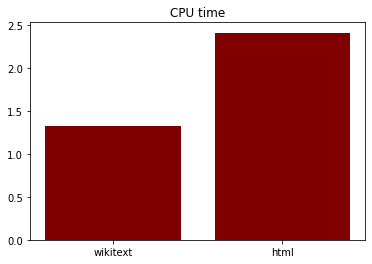

In [261]:
CPU_times = [1.32, 2.41]
Wall_times = [1.37, 2.48]
x_axis = ["wikitext", "html"]
plt.bar(x_axis, height = CPU_times, color = "maroon")
plt.title("CPU time")

Text(0.5, 1.0, 'Wall time')

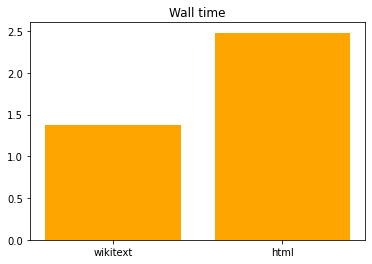

In [262]:
plt.bar(x_axis, height = Wall_times, color = "orange")
plt.title("Wall time")